<a href="https://colab.research.google.com/github/Sweta-Das/ML-with-Python/blob/main/2_4_Naive_Bayes_Classifiers_%26_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classifier

3 kinds of Naive Bayes Classifier in scikit-learn. <br/>
- Gaussian NB (continuous data)
- Bernoulli NB (binary data)
- Multinomial NB (countable data)<br/>
Bernoulli & Multinomial NB are mostly used in text classification.<br/>
<br/>

Understanding Bernoulli NB Classifier:

In [1]:
import numpy as np

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

Here, we've 4 data points, with 4 binary features each. There're 2 classes: 0 & 1.

In [2]:
counts = {}
for label in np.unique(y):
  # iterating over each class
  # counting (sum) entries of 1 per feature

  counts[label] = X[y == label].sum(axis=0)

print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# Decision Trees
Example

In [3]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 15.6 MB/s eta 0:00:00


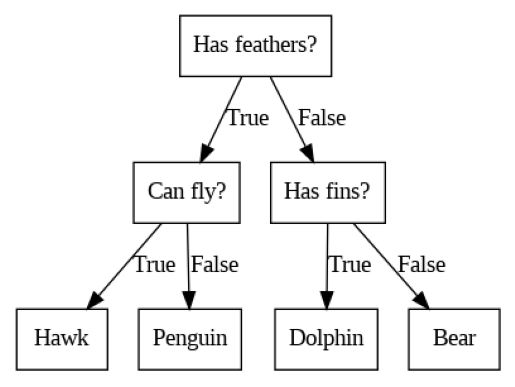

In [4]:
import mglearn

mglearn.plots.plot_animal_tree()

## Decision Tree Classification
Buiding Decision Tree on Breast Cancer Dataset

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

# Loading the dataset
cancer = load_breast_cancer()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify= cancer.target,
                                                    random_state= 42)

In [6]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

random_state in the tree is fixed which is used for tie-breaking internally.

In [7]:
# Train-test accuracy score
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Training set accuracy is 100% because leaves are pure.<br/>

### Pre-pruning of data
(a) Tree with fixed depth

In [8]:
# Setting max depth to 4
tree = DecisionTreeClassifier(max_depth= 4, random_state= 0)
tree.fit(X_train, y_train)

# Train-test accuracy score
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [9]:
# Analyzing decision tree
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names= ["malignant", "benign"],
                feature_names= cancer.feature_names, impurity= False,
                filled= True)

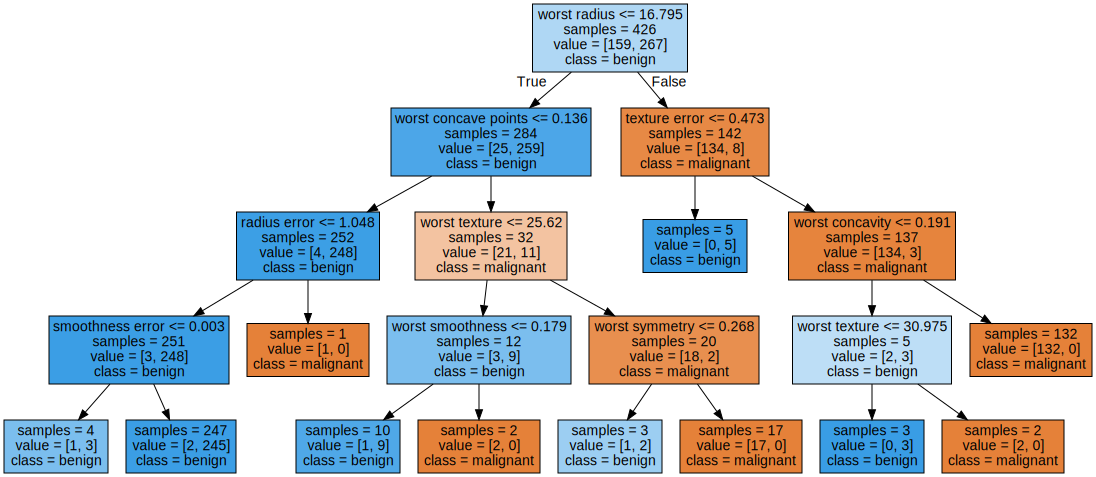

In [10]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

samples: gives the no. of samples in that node<Br/>
value: no. of samples per class

### Feature Importance in Trees
Feature importance rates how important each feature is for the decision a tree makes. It's a number between 0 & 1 for each feature.

In [11]:
print("Feature importances: \n{}".format(tree.feature_importances_))

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


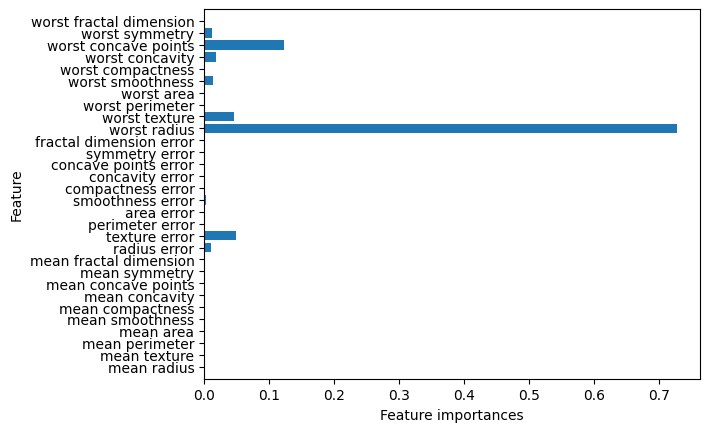

In [12]:
# Visualizing feature importances

import matplotlib.pyplot as plt

def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align= 'center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importances")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

It shows that "worst_split" feature is the most important feature.

Feature importances: [0. 1.]


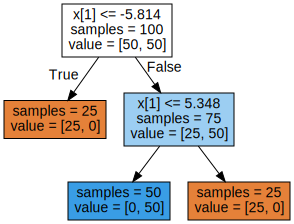

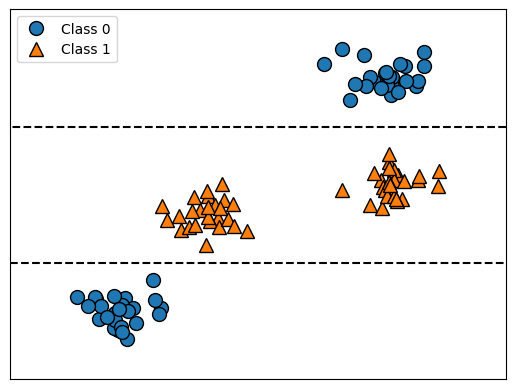

In [13]:
# Non-monotonous relationship between class label & features of dataset
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

From decision tree, only X[1] is used considering that it contains all the info. But the relation between X[1] & the output class is not monotonous i.e., we can't say "a high value of X[1] means class 0, & a low value means class 1" (or vice-versa).

## Decision Tree Regression
Building decision tree to predict future RAM prices based on data till 2000 A.D.

Text(0, 0.5, 'Price in $/Mbyte')

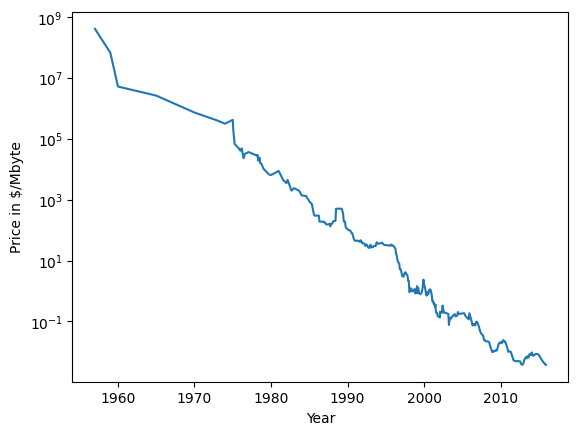

In [14]:
import os
import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                                      "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price) # logarithmic scale of y-axis
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [15]:
# Forecasting for the years after 2000 A.D. using historical data, with the "date" as the only feature
# Prediction is done using both Decision Tree & Linear Regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [16]:
# Predicting prices based on date
X_train = data_train.date[:, np.newaxis]

# Using log transform to get simple relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

<ipython-input-16-3023fcb25037>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]


Transformation from logarithmic to simple data in price is important because it makes a big difference in linear regression, although it doesn't make any difference in Decision Tree.<br/>
np.newaxis introduces new dimension in columns in the dataset.

In [17]:
# predicting on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-17-85256a87241b>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


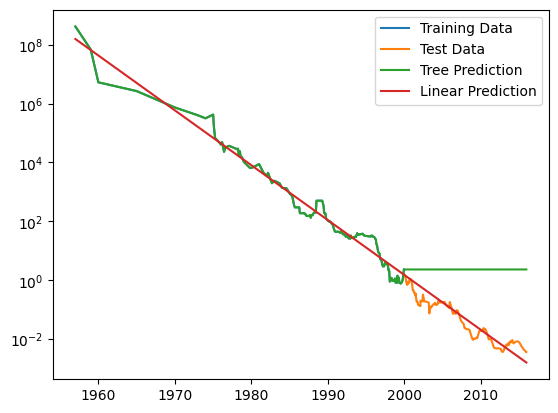

In [18]:
# Comparing the result from decision tree & linear regression model
plt.semilogy(data_train.date, data_train.price, label= "Training Data")
plt.semilogy(data_test.date, data_test.price, label= "Test Data")
plt.semilogy(ram_prices.date, price_tree, label= "Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label= "Linear Prediction")
plt.legend()

We can see that the linear model approximates the data with a line which provides quite a good forecast for test data after 2000 AD. However, the tree model makes perfect predictions on the training data but, in test data, it keeps predicting the last known point. It is unable to generate new responses. This shortcoming applies to all models based on trees.

Advantages of decision trees:<Br/>
- Easy to visualize & understand
- No preprocessing like normalization or standardization of features is required, as data splitting don't depend on scaling. Hence, decision trees are better-suited for dataset where features have different scales.
<br/>

Disadvantages of decision trees: <br/>
- Overfits the data even with pre-pruning.
- Poor generalization performance

# Ensembles of Decision Trees

## Random Forests

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    random_state = 42)


In [20]:
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

n_estimators = 5; means a random forest with 5 decision trees are developed

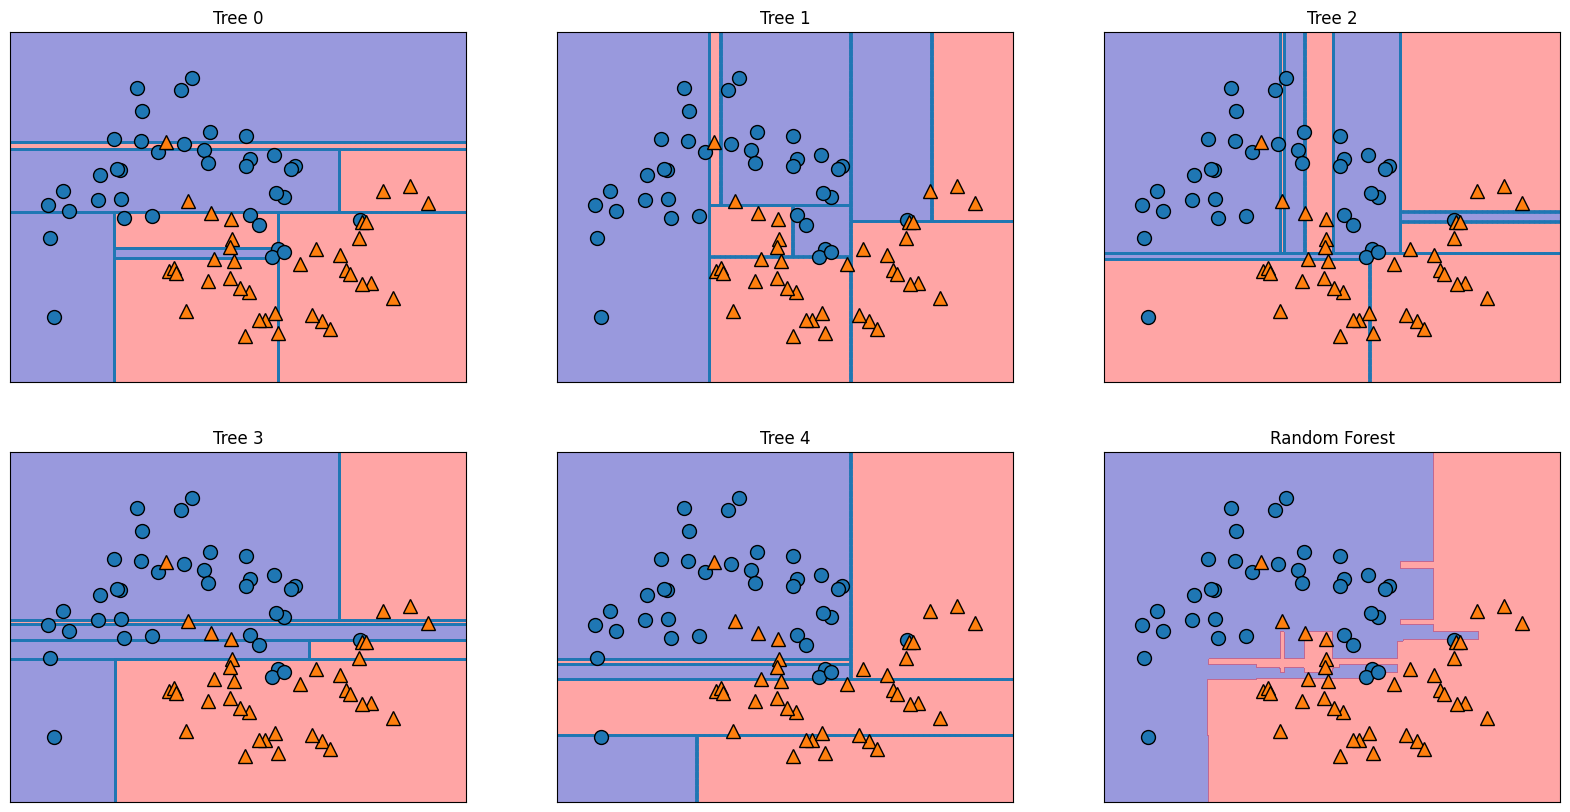

In [21]:
# Visualizing decision boundaries learned by each tree
fig, axes = plt.subplots(2, 3, figsize = (20, 10))

# Trees built as part of random forest are stored in "estimators_"
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax = ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax = axes[-1, -1],
                                alpha = 0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

ravel() => changes a 2D array or a multi-dimensional array into a contiguous flattened array. The returned array has the same data type as the source array or input array.

In [22]:
# Random forest of 100 trees on Breast Cancer dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state = 0)
forest = RandomForestClassifier(n_estimators= 100, random_state= 0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


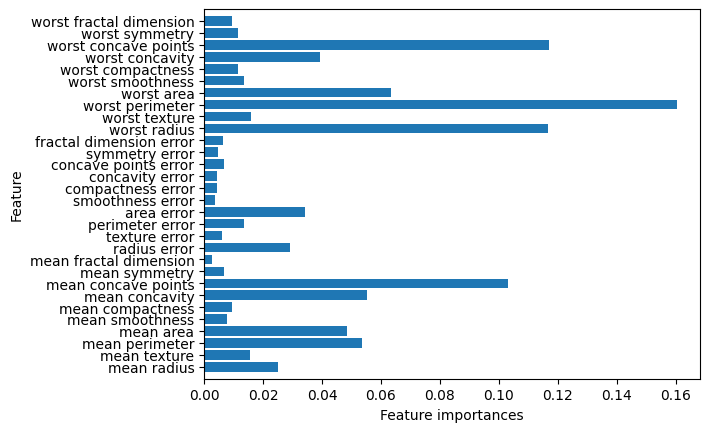

In [23]:
# Visualizing feature importances created by random forest
plot_feature_importances_cancer(forest)

It shows that random forest include more features compared to single decision tree -- i.e., giving more broader view of data.

## Gradient Boosted Regression Trees (Machines)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


Training set accuracy = 100% => Overfitting. To reduce it, we can apply pre-pruning:<br/>
- by limiting the max. depth, or
- lowering the learning rate

In [25]:
# Checking accuracy by limiting the max. depth
gbrt = GradientBoostingClassifier(random_state = 0, max_depth= 1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [26]:
# Checking accuracy by lowering the learning rate
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate= 0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


We can see that the limiting the max depth provided significant improvement in model compared to lowering the learning rate.

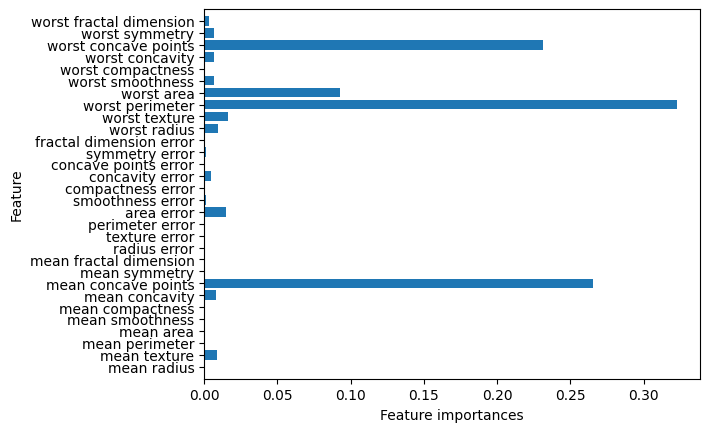

In [27]:
# Checking feature importance after limiting the max. depth
gbrt = GradientBoostingClassifier(random_state = 0, max_depth= 1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

Strengths:<br/>
- Algo. works well without scaling & on a mixture of binary & continuous features.
<br/>

Weakness: <br/>
- Require careful tuning of the parameters
- May take a long time to train
- Doesn't work well on high-dimensional sparse data

Main parameters of gradient boosting models are:<br/>
- number of trees (n_estimators),
- learning rate
- max depth